In [1]:
import requests
import pandas as pd
import numpy as np
from itertools import combinations 
from itertools import permutations 
%matplotlib inline

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [3]:
r = requests.get(url)

In [4]:
json = r.json()

In [5]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
elements_df = pd.DataFrame(json['elements'])
elements_type_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
phases = pd.DataFrame(json['phases'])
element_stats = pd.DataFrame(json['element_stats'])
events = pd.DataFrame(json['events'])
fixtures = pd.read_json('https://fantasy.premierleague.com/api/fixtures/')

elements_df.to_csv('Elements.csv')
teams_df.to_csv('Teams.csv')
phases.to_csv('Phases.csv')
element_stats.to_csv('Element_Stats.csv')
events.to_csv('Events.csv')
fixtures.to_csv('Fixtures.csv')
elements_type_df.to_csv('Elements_Type.csv')

In [7]:
teams_df = teams_df.set_index('id')
fixtures['team_a'] = fixtures['team_a'].map(teams_df['name'])
fixtures['team_h'] = fixtures['team_h'].map(teams_df['name'])

In [8]:
slim_elements_df = elements_df[['code','second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points','form','status']]

In [9]:
elements_type_df = elements_type_df.set_index('id')
slim_elements_df['position'] = slim_elements_df['element_type'].map(elements_type_df['singular_name'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
slim_elements_df['team_name'] = slim_elements_df['team'].map(teams_df['name'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


PPM : Points per minute.

In [11]:
slim_elements_df['PPM'] = slim_elements_df['total_points'] / slim_elements_df['minutes']
slim_elements_df["PPM"] = slim_elements_df["PPM"].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
slim_elements_df.head(5)

,code,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,status,position,team_name,PPM
0,37605,Özil,1,3,1.7,70,1439,0,7.6,53,0.0,a,Midfielder,Arsenal,0.036831
1,39476,Papastathopoulos,1,2,0.4,50,1696,0,11.4,57,0.0,a,Defender,Arsenal,0.033608
2,41270,Luiz Moreira Marinho,1,2,2.7,55,2809,0,17.1,94,0.0,d,Defender,Arsenal,0.033464
3,54694,Aubameyang,1,3,44.9,120,3136,0,17.1,205,0.0,a,Midfielder,Arsenal,0.065370
4,58822,Soares,1,2,0.6,50,1553,0,12.2,61,0.0,a,Defender,Arsenal,0.039279


In [13]:
slim_elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 15 columns):
code                   514 non-null int64
second_name            514 non-null object
team                   514 non-null int64
element_type           514 non-null int64
selected_by_percent    514 non-null object
now_cost               514 non-null int64
minutes                514 non-null int64
transfers_in           514 non-null int64
value_season           514 non-null object
total_points           514 non-null int64
form                   514 non-null object
status                 514 non-null object
position               514 non-null object
team_name              514 non-null object
PPM                    514 non-null float64
dtypes: float64(1), int64(7), object(7)
memory usage: 60.3+ KB


In [14]:
slim_elements_df['ROI'] = slim_elements_df['value_season'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ROI is simply calculated by dividing total_points by now_cost

In [15]:
slim_elements_df.sort_values('ROI',ascending=False).head(10)

,code,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,status,position,team_name,PPM,ROI
100,98747,Pope,4,1,20.4,55,3420,0,30.9,170,0.0,a,Goalkeeper,Burnley,0.049708,30.9
73,131897,Ryan,3,1,21.0,45,3420,0,30.0,135,0.0,a,Goalkeeper,Brighton,0.039474,30.0
322,172649,Henderson,13,1,4.0,55,3240,0,29.1,160,0.0,a,Goalkeeper,Man Utd,0.049383,29.1
344,67089,Dubravka,14,1,0.8,50,3420,0,28.6,143,0.0,i,Goalkeeper,Newcastle,0.041813,28.6
209,17745,Schmeichel,9,1,13.7,55,3420,0,28.4,156,0.0,a,Goalkeeper,Leicester,0.045614,28.4
276,169187,Alexander-Arnold,11,2,54.6,75,3173,0,28.0,210,0.0,a,Defender,Liverpool,0.066183,28.0
491,38533,dos Santos Patrício,20,1,6.8,55,3420,0,27.8,153,0.0,a,Goalkeeper,Wolves,0.044737,27.8
438,87835,Doherty,17,2,26.2,60,2836,0,27.8,167,0.0,a,Defender,Spurs,0.058886,27.8
135,40836,Guaita,6,1,1.6,50,3150,0,27.4,137,0.0,a,Goalkeeper,Crystal Palace,0.043492,27.4
267,97032,van Dijk,11,2,25.8,65,3420,0,27.4,178,0.0,a,Defender,Liverpool,0.052047,27.4


In [16]:
slim_elements_df.pivot_table(index='position',values='ROI').reset_index()

,position,ROI
0,Defender,9.212903
1,Forward,9.221538
2,Goalkeeper,9.496078
3,Midfielder,8.862264


In [17]:
slim_elements_df[slim_elements_df['minutes'] != 0].pivot_table(index='position',values='ROI').reset_index()

,position,ROI
0,Defender,12.417391
1,Forward,11.752941
2,Goalkeeper,15.622581
3,Midfielder,11.318072


In [18]:
slim_elements_df.head(5)

,code,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,status,position,team_name,PPM,ROI
0,37605,Özil,1,3,1.7,70,1439,0,7.6,53,0.0,a,Midfielder,Arsenal,0.036831,7.6
1,39476,Papastathopoulos,1,2,0.4,50,1696,0,11.4,57,0.0,a,Defender,Arsenal,0.033608,11.4
2,41270,Luiz Moreira Marinho,1,2,2.7,55,2809,0,17.1,94,0.0,d,Defender,Arsenal,0.033464,17.1
3,54694,Aubameyang,1,3,44.9,120,3136,0,17.1,205,0.0,a,Midfielder,Arsenal,0.065370,17.1
4,58822,Soares,1,2,0.6,50,1553,0,12.2,61,0.0,a,Defender,Arsenal,0.039279,12.2


In [19]:
total_players = slim_elements_df['team_name'].value_counts().reset_index(name='Number of Players')

In [20]:
total_players = total_players.rename(columns={'index':'team_name'})

In [21]:
temp = slim_elements_df.pivot_table(index=['team_name','position'],values='ROI').reset_index().sort_values('ROI',ascending=False)
temp = temp.pivot_table('ROI', ['team_name'], 'position').reset_index()

In [22]:
temp.columns.name = None
temp

,team_name,Defender,Forward,Goalkeeper,Midfielder
0,Arsenal,7.661538,9.050000,15.050000,10.592308
1,Aston Villa,9.450000,4.500000,5.700000,12.977778
2,Brighton,9.890000,9.875000,15.000000,9.225000
3,Burnley,14.562500,13.900000,15.450000,12.016667
4,Chelsea,11.650000,8.700000,10.300000,9.063636
5,Crystal Palace,10.233333,10.966667,14.500000,9.145455
6,Everton,11.457143,12.850000,7.800000,7.708333
7,Fulham,0.000000,0.000000,0.000000,0.000000
8,Leeds,0.000000,0.000000,0.000000,0.000000
9,Leicester,8.670000,15.850000,14.200000,11.236364


In [23]:
team_cost_df = slim_elements_df.pivot_table(index='team_name',values='now_cost',aggfunc=np.sum).reset_index()
team_points_df = slim_elements_df.pivot_table(index='team_name',values='total_points',aggfunc=np.sum).reset_index()
ROI_df = slim_elements_df.pivot_table(index='team_name',values='ROI',aggfunc=np.mean).reset_index()
ROI_df = ROI_df.merge(total_players,on='team_name',how='inner')

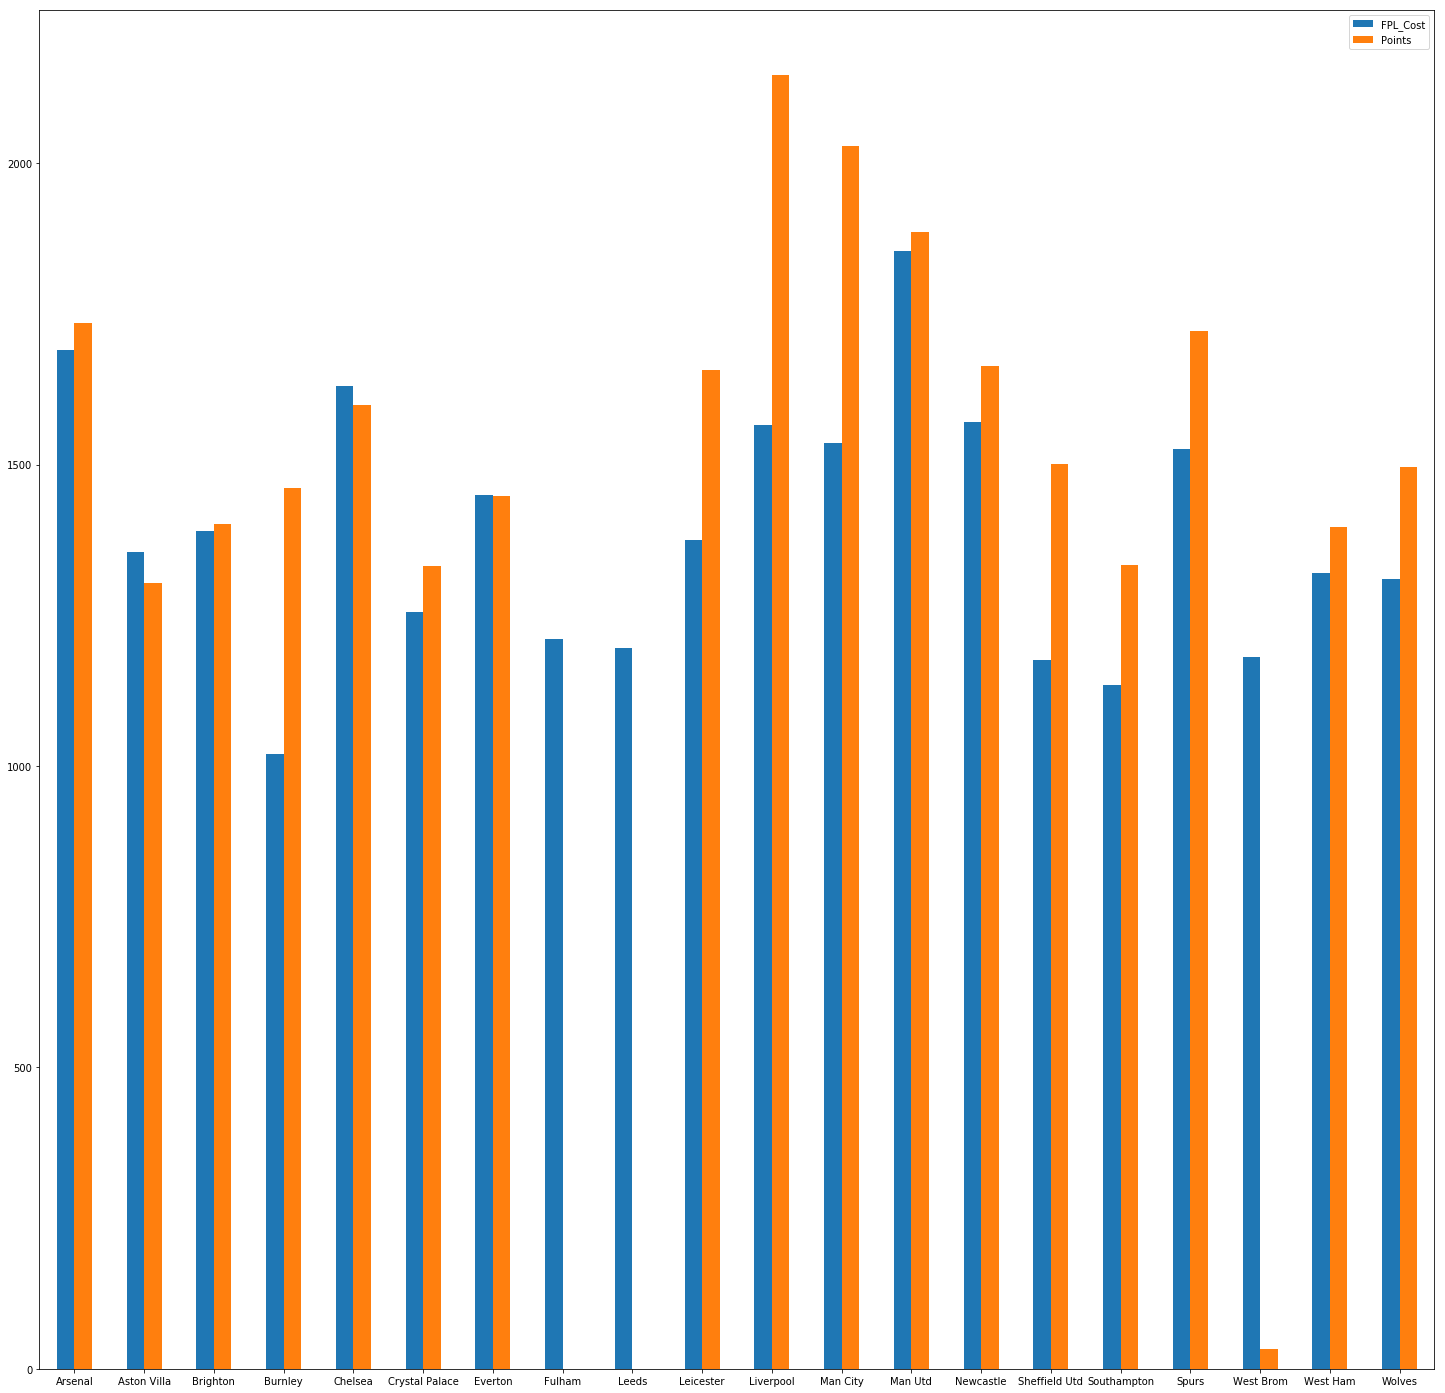

In [24]:
index = list(team_cost_df['team_name'])
df = pd.DataFrame({'FPL_Cost': list(team_cost_df['now_cost']),
                   'Points': list(team_points_df['total_points'])}, index=index)
ax = df.plot.bar(rot=0, figsize=(25,25))

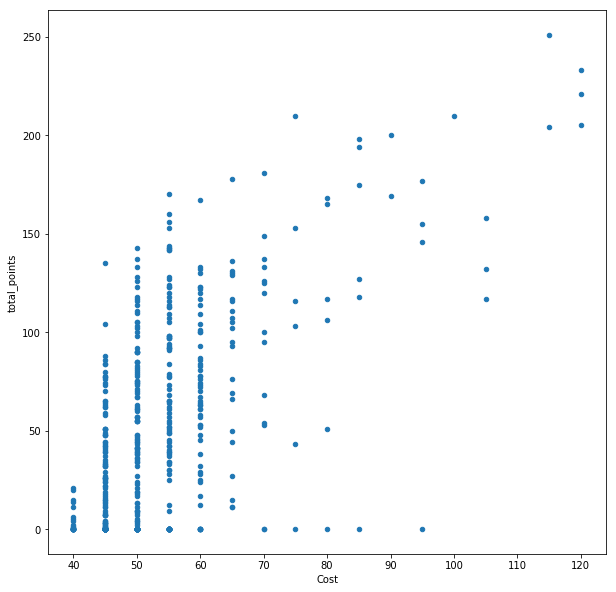

In [25]:
index = list(slim_elements_df['second_name'])
df = pd.DataFrame({'Cost': list(slim_elements_df['now_cost']),
                   'total_points': list(slim_elements_df['total_points'])}, index=index)
ax = df.plot.scatter(y='total_points',x='Cost',figsize=(10,10))

In [26]:
player_dict = {}
j=0
player_name = list(slim_elements_df['second_name'])
for i in slim_elements_df['code']:
    player_dict[i] = player_name[j]
    j+=1

In [27]:
def find_difficulty(slim_elements_df):
    for player in list(slim_elements_df['second_name']):
        team_name = slim_elements_df.loc[slim_elements_df['second_name'] == player,'team_name'].values[0]
        game_week = 1
        difficulty_values = fixtures[((fixtures['team_a'] == team_name) | (fixtures['team_h'] == team_name)) & (fixtures['event']<=game_week+4)]
        home_diff = list(difficulty_values[difficulty_values['team_h'] == team_name]['team_h_difficulty'])
        away_diff = list(difficulty_values[difficulty_values['team_a'] == team_name]['team_a_difficulty'])
        if len(home_diff+away_diff) >= 5:
            slim_elements_df.loc[slim_elements_df['second_name'] == player, 'UpcomingDifficulty'] = sum(home_diff+away_diff) 

In [28]:
find_difficulty(slim_elements_df)
slim_elements_df['UpcomingDifficulty'] = slim_elements_df['UpcomingDifficulty'].fillna(value=50)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [29]:
slim_elements_df = slim_elements_df[slim_elements_df['status'] == 'a']

In [30]:
def select_player(res_df, optimal_player, cost, column_names):
    res_df = res_df[res_df['now_cost'] == cost]
    short_listed = {}
    for player in list(res_df['code']): 
        short_listed[player] = 0
    for column in column_names:
        if (column == 'UpcomingDifficulty') or (column == 'goals_conceded'):
            temp = res_df.sort_values(by=column,ascending=True).head(10)
        else:
            temp = res_df.sort_values(by=column,ascending=False).head(10)
        temp.index = np.arange(1, len(temp) + 1)
        for key in short_listed:
            if key in list(temp['code']):
                short_listed[key] += temp[temp['code'] == key].index.values[0]
            else:
                short_listed[key] += 11
    if min(short_listed, key=short_listed.get) in optimal_player:
        for i in range(1,len(short_listed)+1):
            if(sorted(short_listed.items(), key=lambda x: x[1], reverse=False)[i][0]) in optimal_player:
                continue
            else:
                return sorted(short_listed.items(), key=lambda x: x[1], reverse=False)[i][0]
    else:
        return min(short_listed, key=short_listed.get)

In [31]:
def reduce_combinations(df):
    cost_dict = dict()
    for cost in df['now_cost']:
        if cost in cost_dict:
            cost_dict[cost] += 1
        else:
            cost_dict[cost] = 1
    for cost in cost_dict:
        if cost_dict[cost] > 5:
            cost_dict[cost] = 5
    lst = []
    for cost in cost_dict:
        for i in range(cost_dict[cost]):
            lst.append(cost)
    return lst

In [32]:
def findCombinations(lst, budget, n): 
    return [pair for pair in combinations(lst, n) if sum(pair) == budget] 

In [33]:
def main_function(df, column_names, budget, n):
    shortlisted_list = []
    lst = reduce_combinations(df)
    combined = findCombinations(lst, budget, n)
    allowed_values = list(set(combined)) 
    sorted_values = []
    for row in allowed_values:
        sorted_values.append(sorted(row))
    temp_set = set(tuple(x) for x in sorted_values)
    unique_values = [list(x) for x in temp_set]
    
    for value in unique_values:
        optimal_player = []
        for cost in value:
            choosen = select_player(df, optimal_player, cost, column_names)
            optimal_player.append(choosen) 
        shortlisted_list.append(optimal_player)
    return shortlisted_list

In [34]:
def prepare_df(df, columns, shortlisted_list):
    shortlisted_df = pd.DataFrame()
    for row in shortlisted_list:
        temp_df = pd.DataFrame()
        for value in row:
            temp_df = temp_df.append(df[df['code'] == value])
        temp_df[columns] = temp_df[columns].apply(pd.to_numeric)
        shortlisted_df = shortlisted_df.append(temp_df[columns].mean(), ignore_index=True)
    shortlisted_df = shortlisted_df.reset_index()
    return shortlisted_df

In [35]:
def final_selected(shortlisted_df, columns):
    res_df = shortlisted_df
    short_listed = {}
    optimal_players = []
    for player in list(res_df.index): 
        short_listed[player]= 0
    for column in column_names:
        if (column == 'UpcomingDifficulty') or (column == 'goals_conceded'):
            temp = res_df.sort_values(by=column,ascending=True).head(10)
        else:
            temp = res_df.sort_values(by=column,ascending=False).head(10)
        temp.index = np.arange(1, len(temp) + 1)
        for key in short_listed:
            if key in list(temp['index']):
                short_listed[key] += temp[temp['index'] == key].index.values[0]
            else:
                short_listed[key] += 11
    if min(short_listed, key=short_listed.get) in optimal_players:
        for i in range(1,len(short_listed)+1):
            if(sorted(short_listed.items(), key=lambda x: x[1], reverse=False)[i][0]) in optimal_players:
                continue
            else:
                optimal_players.append(sorted(short_listed.items(), key=lambda x: x[1], reverse=False)[i][0])
    else:
        optimal_players.append(min(short_listed, key=short_listed.get))
    return optimal_players

In [36]:
def print_names(shortlisted_list,mvp):
    for player in shortlisted_list[mvp[0]]:
        print(player_dict[player])

In [37]:
fwd_df = slim_elements_df[slim_elements_df['position'] == 'Forward']
mid_df = slim_elements_df[slim_elements_df['position'] == 'Midfielder']
def_df = slim_elements_df[slim_elements_df['position'] == 'Defender']
gk_df = slim_elements_df[slim_elements_df['position'] == 'Goalkeeper']

In [38]:
final_list = list()

In [39]:
gk_df = gk_df.merge(elements_df[['code','clean_sheets','goals_conceded','penalties_saved','saves']],on=['code'], how='inner')
column_names = ['total_points','ROI','PPM','clean_sheets','saves','UpcomingDifficulty']
shortlisted_list = main_function(gk_df, column_names, 100, 2)

columns = ['minutes','total_points','PPM','ROI','UpcomingDifficulty','form','clean_sheets','saves','goals_conceded']
shortlisted_df = prepare_df(gk_df,columns, shortlisted_list)
mvp = final_selected(shortlisted_df,columns)
print_names(shortlisted_list, mvp)
final_list.append(shortlisted_list[mvp[0]])

Ryan
Pope


In [40]:
mid_df = mid_df.merge(elements_df[['code','assists','ict_index','goals_scored']],on=['code'], how='inner')
column_names = ['assists','ict_index','form','goals_scored','ROI','PPM','UpcomingDifficulty']
shortlisted_list = main_function(mid_df, column_names, 385, 5)

columns = ['minutes','total_points','PPM','ROI','UpcomingDifficulty','form','assists','ict_index','goals_scored']
shortlisted_df = prepare_df(mid_df,columns,shortlisted_list)
mvp = final_selected(shortlisted_df,columns)
print_names(shortlisted_list, mvp)
final_list.append(shortlisted_list[mvp[0]])

Lundstram
Pérez
Grealish
Borges Da Silva
De Bruyne


In [41]:
def_df = def_df.merge(elements_df[['code','assists','clean_sheets','goals_conceded','goals_scored']],on=['code'], how='inner')
column_names = ['assists','form','goals_scored','goals_conceded','clean_sheets','ROI','PPM','UpcomingDifficulty']
shortlisted_list = main_function(def_df, column_names, 275, 5)

columns = ['minutes','total_points','PPM','ROI','UpcomingDifficulty','form','assists','goals_conceded','goals_scored','clean_sheets']
shortlisted_df = prepare_df(def_df,columns,shortlisted_list)
mvp = final_selected(shortlisted_df,columns)
print_names(shortlisted_list, mvp)
final_list.append(shortlisted_list[mvp[0]])

Dunk
Egan
Basham
Doherty
van Dijk


In [42]:
fwd_df = fwd_df.merge(elements_df[['code','assists','ict_index','goals_scored']],on=['code'], how='inner')
column_names = ['assists','ict_index','form','goals_scored','ROI','PPM','UpcomingDifficulty']
shortlisted_list = main_function(fwd_df, column_names, 240, 3)

columns = ['minutes','total_points','PPM','ROI','UpcomingDifficulty','form','assists','ict_index','goals_scored']
shortlisted_df = prepare_df(fwd_df,columns,shortlisted_list)
mvp = final_selected(shortlisted_df,columns)
print_names(shortlisted_list, mvp)
final_list.append(shortlisted_list[mvp[0]])

Maupay
Ings
Martial


In [43]:
final_list

[[131897, 98747],
 [153723, 168580, 114283, 47431, 61366],
 [83299, 108416, 40386, 87835, 97032],
 [115382, 84939, 148225]]

In [44]:
flat_list = [item for sublist in final_list for item in sublist]
final_dict = {}

In [45]:
for player in flat_list:
    if slim_elements_df[slim_elements_df['code'] == player]['team_name'].iloc[0] in final_dict:
        final_dict[slim_elements_df[slim_elements_df['code'] == player]['team_name'].iloc[0]] += 1
    else:
        final_dict[slim_elements_df[slim_elements_df['code'] == player]['team_name'].iloc[0]] = 1